In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/HackCBS/healthcare-dataset-stroke-data.csv")
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [ ]:
df.drop(["id"], axis = 1, inplace = True)

In [ ]:
df.dropna(inplace = True)
df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000
mean,42.865374,0.091872,0.049501,105.305150,28.893237,0.042575
std,22.555115,0.288875,0.216934,44.424341,7.854067,0.201917
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.070000,23.500000,0.000000
50%,44.000000,0.000000,0.000000,91.680000,28.100000,0.000000
75%,60.000000,0.000000,0.000000,113.570000,33.100000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [ ]:
df["Residence_type"].replace("Urban", 1, inplace = True)
df["Residence_type"].replace("Rural", 0, inplace = True)
df["ever_married"].replace("Yes", 1, inplace = True)
df["ever_married"].replace("No", 0, inplace = True)
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,1,Private,1,228.69,36.6,formerly smoked,1
2,Male,80.0,0,1,1,Private,0,105.92,32.5,never smoked,1
3,Female,49.0,0,0,1,Private,1,171.23,34.4,smokes,1
4,Female,79.0,1,0,1,Self-employed,0,174.12,24.0,never smoked,1
5,Male,81.0,0,0,1,Private,1,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5104,Female,13.0,0,0,0,children,0,103.08,18.6,Unknown,0
5106,Female,81.0,0,0,1,Self-employed,1,125.20,40.0,never smoked,0
5107,Female,35.0,0,0,1,Self-employed,0,82.99,30.6,never smoked,0
5108,Male,51.0,0,0,1,Private,0,166.29,25.6,formerly smoked,0


In [ ]:
new_df = pd.get_dummies(df[["work_type", "smoking_status", "gender"]])
df.drop(["work_type", "smoking_status", "gender"], axis = 1, inplace = True)
df = pd.concat([new_df, df], axis = 1, join = "inner")
df.head()

,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,gender_Female,gender_Male,gender_Other,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke
0,0,0,1,0,0,0,1,0,0,0,1,0,67.0,0,1,1,1,228.69,36.6,1
2,0,0,1,0,0,0,0,1,0,0,1,0,80.0,0,1,1,0,105.92,32.5,1
3,0,0,1,0,0,0,0,0,1,1,0,0,49.0,0,0,1,1,171.23,34.4,1
4,0,0,0,1,0,0,0,1,0,1,0,0,79.0,1,0,1,0,174.12,24.0,1
5,0,0,1,0,0,0,1,0,0,0,1,0,81.0,0,0,1,1,186.21,29.0,1


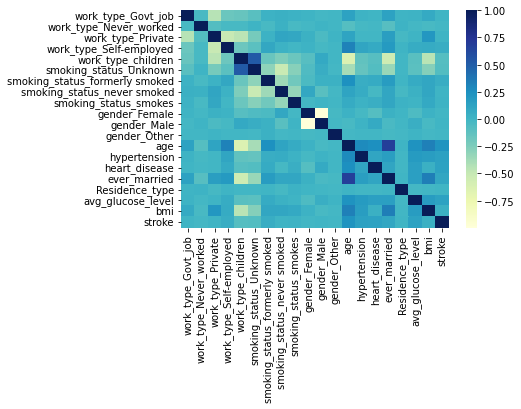

In [ ]:
dataplot = sns.heatmap(df.corr(), cmap="YlGnBu", annot=False)
plt.show()

In [ ]:
df.describe()

,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,gender_Female,gender_Male,gender_Other,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke
count,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000
mean,0.128336,0.004482,0.572622,0.157873,0.136688,0.302098,0.170503,0.377266,0.150132,0.590141,0.409656,0.000204,42.865374,0.091872,0.049501,0.652679,0.507232,105.305150,28.893237,0.042575
std,0.334497,0.066801,0.494748,0.364659,0.343552,0.459214,0.376113,0.484752,0.357238,0.491858,0.491820,0.014273,22.555115,0.288875,0.216934,0.476167,0.499999,44.424341,7.854067,0.201917
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.080000,0.000000,0.000000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,77.070000,23.500000,0.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,44.000000,0.000000,0.000000,1.000000,1.000000,91.680000,28.100000,0.000000
75%,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,60.000000,0.000000,0.000000,1.000000,1.000000,113.570000,33.100000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,82.000000,1.000000,1.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4909 entries, 0 to 5109
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   work_type_Govt_job              4909 non-null   uint8  
 1   work_type_Never_worked          4909 non-null   uint8  
 2   work_type_Private               4909 non-null   uint8  
 3   work_type_Self-employed         4909 non-null   uint8  
 4   work_type_children              4909 non-null   uint8  
 5   smoking_status_Unknown          4909 non-null   uint8  
 6   smoking_status_formerly smoked  4909 non-null   uint8  
 7   smoking_status_never smoked     4909 non-null   uint8  
 8   smoking_status_smokes           4909 non-null   uint8  
 9   gender_Female                   4909 non-null   uint8  
 10  gender_Male                     4909 non-null   uint8  
 11  gender_Other                    4909 non-null   uint8  
 12  age                             49

In [ ]:
## Model Creation 
import tensorflow as tf 

from tensorflow.keras import layers
from tensorflow.keras import Sequential
from tensorflow.keras import Model 
from tensorflow.keras import optimizers as OPT
from tensorflow.keras import losses
from tensorflow.keras.utils import Sequence 

from sklearn.model_selection import train_test_split

In [ ]:
y = df["stroke"]
df.drop("stroke", axis = 1, inplace = True)
train_x, test_x, train_y, test_y = train_test_split(df, y, test_size = 0.2, random_state = 10)

In [ ]:
train_x, val_x, train_y, val_y = train_test_split(train_x, train_y, test_size = 0.1, random_state = 10)

In [ ]:
print(train_x.shape, val_x.shape, test_x.shape)

(3534, 19) (393, 19) (982, 19)


In [ ]:
model = Sequential([
    layers.Dense(units = 128, activation = "sigmoid", input_shape = (19, ), kernel_initializer = "normal"),
    layers.Dense(units = 64, activation = "relu", kernel_initializer = "normal"),
    layers.Dense(units = 32, activation = "sigmoid", kernel_initializer = "normal"),
    layers.Dense(units = 16, activation = "relu", kernel_initializer = "normal"),
    layers.Dense(units = 8, activation = "sigmoid", kernel_initializer = "normal"),
    layers.Dense(units = 1, activation = "sigmoid")
])

model.compile(loss = "binary_crossentropy", optimizer = "adam")

In [ ]:
model.fit(df, y, 16, 75)

Epoch 1/75
307/307 [==============================] - 2s 7ms/step - loss: 0.1419
Epoch 2/75
307/307 [==============================] - 1s 3ms/step - loss: 0.1414
Epoch 3/75
307/307 [==============================] - 1s 3ms/step - loss: 0.1414
Epoch 4/75
307/307 [==============================] - 1s 2ms/step - loss: 0.1411
Epoch 5/75
307/307 [==============================] - 1s 2ms/step - loss: 0.1398
Epoch 6/75
307/307 [==============================] - 1s 2ms/step - loss: 0.1415
Epoch 7/75
307/307 [==============================] - 1s 2ms/step - loss: 0.1406
Epoch 8/75
307/307 [==============================] - 1s 2ms/step - loss: 0.1390
Epoch 9/75
307/307 [==============================] - 1s 2ms/step - loss: 0.1409
Epoch 10/75
307/307 [==============================] - 1s 2ms/step - loss: 0.1392
Epoch 11/75
307/307 [==============================] - 1s 2ms/step - loss: 0.1388
Epoch 12/75
307/307 [==============================] - 1s 2ms/step - loss: 0.1392
Epoch 13/75
307/307 [====

In [ ]:
model.save("stroke.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>